In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Preprocessing_68/processed_with_logtransform.csv',sep=',', parse_dates=['datetime'],index_col='datetime')

print("Original shape:", df.shape)

Original shape: (2047840, 20)


In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# Separate target from features
target = df['Global_active_power']
features = df.drop(columns=['Global_active_power'])

In [4]:
# Apply Min–Max Scaling
scaler = MinMaxScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features),columns=features.columns,index=features.index)

# Reattach target column
df_scaled = pd.concat([target, features_scaled], axis=1)


In [5]:
output_file = '/content/drive/MyDrive/Preprocessing_68/processed_scaled.csv'
df_scaled.to_csv(output_file, index=True)

print("Scaled dataset saved to:", output_file)

Scaled dataset saved to: /content/drive/MyDrive/Preprocessing_68/processed_scaled.csv


Before scaling:
                      Voltage  Sub_metering_1
datetime                                    
2006-12-17 17:24:00   232.65             0.0
2006-12-17 17:25:00   231.20             0.0
2006-12-17 17:26:00   232.86             0.0
2006-12-17 17:27:00   232.89             0.0
2006-12-17 17:28:00   232.33             0.0

After scaling:
                       Voltage  Sub_metering_1
datetime                                     
2006-12-17 17:24:00  0.305331             0.0
2006-12-17 17:25:00  0.258481             0.0
2006-12-17 17:26:00  0.312116             0.0
2006-12-17 17:27:00  0.313086             0.0
2006-12-17 17:28:00  0.294992             0.0


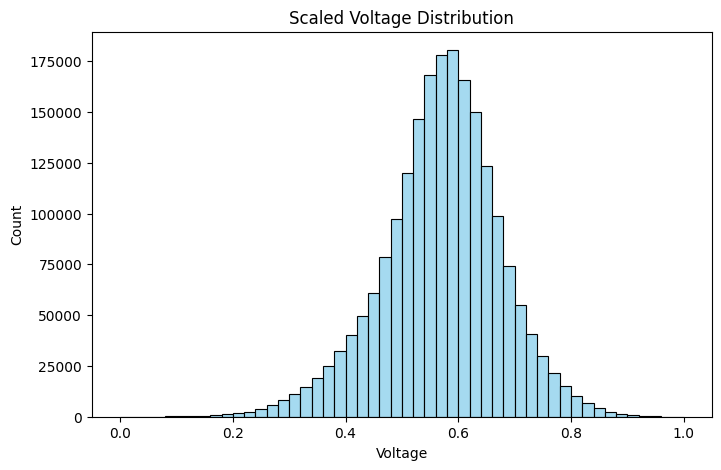

In [6]:
#EDA visualization
# Compare before vs after scaling for a few features
print("Before scaling:\n", df[['Voltage','Sub_metering_1']].head())
print("\nAfter scaling:\n", df_scaled[['Voltage','Sub_metering_1']].head())

# Histogram after scaling
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_scaled['Voltage'], bins=50, color='skyblue')
plt.title("Scaled Voltage Distribution")
plt.savefig('/content/drive/MyDrive/Preprocessing_68/eda_visualizations/scaled_voltage.png',dpi=300, bbox_inches='tight')
plt.show()
